In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
from sklearn.datasets import load_boston

In [67]:
def normalise(X):
    mean_array= []
    std_array =[]
    for i in range(X.shape[1]):
        mean = X[:,i].mean()
        mean_array.append(mean)

        std = X[:,i].std()
        std_array.append(std)

        X[:, i] = (X[:,i] - mean)/ (std)


    return X,  mean_array, std_array

In [68]:
def normaliseTest(X_test, mean_array, std_array ):
    for i in range(X_test.shape[1] -1 ):
        X_test[:,i]= (X_test[:,i]- mean_array[i])/(std_array[i])

    return X_test



In [69]:
#add a new colum with ones to X
def addNewColumn(X):

    new_column = np.array([1]*X.shape[0])
    X = np.insert(X, 0, new_column,axis=1)
    return X


In [70]:
#initialise thetas 
def thetas(X, initial_value):
    return np.array([initial_value]*X.shape[1])


In [71]:
def h(X, theta):
    return X@theta

In [72]:
def J(X, theta, y):
    return (((h(X, theta) - y).T@(h(X,theta)-y)))/(2*X.shape[0])

In [120]:
def gradientDescent(X, y, alpha, num_epochs):
    J_hist = []
    theta = thetas(X, 0.0)
    for epoch in range(num_epochs):
        H = h(X, theta)
        J_epoch = J(X, theta, y)
        J_hist.append(J_epoch)
        print("epoch " , epoch , " -------------> J(theta) = ", J_epoch , "\n")
        descent = alpha*( (1/X.shape[0])* np.dot( (X.T), H - y )  )
        theta = theta - descent

    return J_hist, theta
        


In [123]:

def fit(X, y, alpha, num_epochs ):
    #feature scaling 
    X, mean, std =  normalise(X)
    # add new column of 1's to X
    X = addNewColumn(X)
    # Returns the cost function and the final theta values
    J_values, params = gradientDescent(X, y, alpha, num_epochs)

    print('Final Cost function value ---->' , J_values[-1], "\n")
    print('Parameters of the linear regression ---->',"\n", str(params), "\n")
    print()
    plt.plot(J_values)
    plt.title('Cost function for alpha = '+ str(alpha))
    plt.xlabel('Iterations')
    plt.ylabel('Cost function')

    return J_values, params, mean, std


def predict(X_test, model):
    X_test_norm = normaliseTest(X_test, model[2], model[3])
    X_test = addNewColumn(X_test)
    return np.dot(X_test, model[1])






epoch  0  -------------> J(theta) =  296.07345849802374 

epoch  1  -------------> J(theta) =  235.05549311601882 

epoch  2  -------------> J(theta) =  190.5889208189497 

epoch  3  -------------> J(theta) =  156.06024170813902 

epoch  4  -------------> J(theta) =  128.57937663479325 

epoch  5  -------------> J(theta) =  106.49105494789966 

epoch  6  -------------> J(theta) =  88.66097897920923 

epoch  7  -------------> J(theta) =  74.23862911731077 

epoch  8  -------------> J(theta) =  62.559837850842484 

epoch  9  -------------> J(theta) =  53.096339305267314 

epoch  10  -------------> J(theta) =  45.42428377339772 

epoch  11  -------------> J(theta) =  39.20211654827778 

epoch  12  -------------> J(theta) =  34.15397469908608 

epoch  13  -------------> J(theta) =  30.056779235547886 

epoch  14  -------------> J(theta) =  26.730011375794433 

epoch  15  -------------> J(theta) =  24.02753374863557 

epoch  16  -------------> J(theta) =  21.831012267888564 

epoch  17  ---

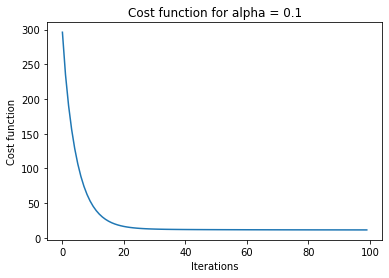

In [124]:
model = fit(X_train, y_train, alpha=0.1, num_epochs=100)

In [125]:
y_pred = predict(X_train[:20,:], model)

In [126]:
def accuracy(y_pred, y):
    root_mean_squared_error = np.sqrt(np.mean((y_pred - y).T@(y_pred - y)))
    print("MSE -----------" , root_mean_squared_error)


In [127]:
accuracy(y_pred, y_train[:20])

MSE ----->>>>> 17.25007204706603
